<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#LLMGAG" data-toc-modified-id="LLMGAG-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>LLMGAG</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Run" data-toc-modified-id="Run-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Run</a></span></li></ul></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Number-of-genes-assembled-&amp;-clustered" data-toc-modified-id="Number-of-genes-assembled-&amp;-clustered-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Number of genes assembled &amp; clustered</a></span></li><li><span><a href="#Taxonomy" data-toc-modified-id="Taxonomy-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Taxonomy</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Annotations" data-toc-modified-id="Annotations-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Annotations</a></span><ul class="toc-item"><li><span><a href="#COG-functional-categories" data-toc-modified-id="COG-functional-categories-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>COG functional categories</a></span></li><li><span><a href="#Grouped-by-taxonomy" data-toc-modified-id="Grouped-by-taxonomy-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Grouped by taxonomy</a></span></li></ul></li><li><span><a href="#humann2-db-genes" data-toc-modified-id="humann2-db-genes-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>humann2 db genes</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#By-taxonomy" data-toc-modified-id="By-taxonomy-5.4.1.1"><span class="toc-item-num">5.4.1.1&nbsp;&nbsp;</span>By taxonomy</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Run `LLMGAG` (metagenome assembly of genes) pipeline on animal gut microbiome metagenome study
* study = PRJEB23642
  * host = Minke whale

# Var

In [1]:
studyID = 'PRJEB23642'
base_dir = file.path('/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/',
                     studyID)
tmp_out_dir = file.path('/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl/',
                        studyID)

work_dir = file.path(base_dir, 'LLMGAG')

pipeline_dir = '/ebio/abt3_projects/methanogen_host_evo/bin/llmgag'
threads = 24

# Init

In [6]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
set.seed(8304)

source('/ebio/abt3_projects/Georg_animal_feces/code/misc_r_functions/init.R')

In [3]:
make_dir(base_dir)
make_dir(tmp_out_dir)
make_dir(work_dir)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects//PRJEB23642 
Directory already exists: /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB23642 
Created directory: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects//PRJEB23642/LLMGAG 


# LLMGAG

## Setup

In [4]:
cat_file(file.path(work_dir, 'config.yaml'))

#-- I/O --#
# table with sample --> read_file information
samples_file: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/PRJEB23642/LLMGQC/final/samples.txt

# output location
output_dir: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/PRJEB23642/LLMGAG/

#-- database --#
## eggnog mapper
eggnog_diamond_db: /ebio/abt3_projects/databases_no-backup/Eggnog/v2/eggnog_proteins.dmnd
eggnog_db: /ebio/abt3_projects/databases_no-backup/Eggnog/v2/eggnog.db
## mmseqs taxonomy
mmseqs_tax_db: /ebio/abt3_projects/databases_no-backup/uniclust/uniclust50/uniclust50_2018_08_consensus
## checkM
checkM_data: /ebio/abt3_projects/databases_no-backup/checkM/
## sourmash
sourmash_db: /ebio/abt3_projects/databases_no-backup/sourmash/genbank-k31.sbt.json
sourmash_lca_db: /ebio/abt3_projects/databases_no-backup/sourmash/genbank-k31.lca.json.gz
# humann2 diamond
humann2_diamond_db: /ebio/abt3_projects/databases_no-backup/humann2/uniref50/uniref50_annot

### Run

```{bash}
(snakemake_dev) @ rick:/ebio/abt3_projects/methanogen_host_evo/bin/llmgag
$ screen -L -S llmgag-PRJEB23642 ./snakemake_sge.sh /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/PRJEB23642/LLMGAG/config.yaml cluster.json /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/PRJEB23642/LLMGAG/SGE_log 24
```

In [5]:
pipelineInfo(pipeline_dir)

LLMGAG

Ley Lab Metagenome Assembly of Genes (LLMGAG)

* Version: 0.1.3
* Authors:
  * Nick Youngblut <nyoungb2@gmail.com>
* Maintainers:
  * Nick Youngblut <nyoungb2@gmail.com>

--- conda envs ---
==> /ebio/abt3_projects/methanogen_host_evo/bin/llmgag/bin/envs/annotate.yaml <==
channels: !!python/tuple
- bioconda
dependencies:
- pigz
- bioconda::fasta-splitter
- bioconda::eggnog-mapper

==> /ebio/abt3_projects/methanogen_host_evo/bin/llmgag/bin/envs/checkm.yaml <==
channels: !!python/tuple
- bioconda
dependencies:
- python=2
- pigz
- bioconda::prodigal
- bioconda::pplacer
- bioconda::checkm-genome

==> /ebio/abt3_projects/methanogen_host_evo/bin/llmgag/bin/envs/das_tool.yaml <==
channels: !!python/tuple
- r
- bioconda
dependencies:
- pigz
- ruby
- r::r-base
- r::r-data.table
- r::r-domc
- r::r-ggplot2
- bioconda::pullseq
- bioconda::prodigal
- bioconda::blast
- bioconda::diamond
==> /ebio/abt3_projects/methanogen_host_evo/bin/llmgag/bin/envs/dask.yaml <==
channels: !!python/tuple
- co

# Summary

## Number of genes assembled & clustered

In [7]:
F = file.path(work_dir, 'assembly', 'plass', 'genes.faa')
cmd = glue::glue('grep -c ">" {fasta}', fasta=F)
n_raw_seqs = system(cmd, intern=TRUE)
cat('Number of assembled sequences:', n_raw_seqs, '\n')

Number of assembled sequences: 119545122 


In [8]:
F = file.path(work_dir, 'cluster', 'linclust', 'clusters_rep-seqs.faa')
cmd = glue::glue('grep -c ">" {fasta}', fasta=F)
n_rep_seqs = system(cmd, intern=TRUE)
cat('Number of cluster rep sequences:', n_rep_seqs, '\n')

Number of cluster rep sequences: 150815 


In [9]:
F = file.path(work_dir, 'humann2_db', 'clusters_rep-seqs.faa.gz')
cmd = glue::glue('gunzip -c {fasta} | grep -c ">"', fasta=F)
n_h2_seqs = system(cmd, intern=TRUE)
cat('Number of humann2_db-formatted seqs:', n_h2_seqs, '\n')

Number of humann2_db-formatted seqs: 3457 


## Taxonomy

In [10]:
# reading in taxonomy table
## WARING: slow
F = file.path(work_dir, 'taxonomy', 'clusters_rep-seqs_tax_db.tsv.gz')
cmd = glue::glue('gunzip -c {file}', file=F) 
coln = c('seqID', 'taxID', 'rank', 'spp', 'lineage')
levs = c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species')
tax = fread(cmd, sep='\t', header=FALSE, col.names=coln, fill=TRUE) %>%
    separate(lineage, levs, sep=':')
tax %>% dfhead

Warning message:
“Expected 7 pieces. Additional pieces discarded in 5 rows [24417, 46627, 48133, 105546, 144516].”Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 136473 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 18, 19, 20, 21, 22, 23, ...].”

[1] 150815     11


seqID,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus,Species
6d23a580ae9d42519d7d05a5924a4b3b,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA
953ee85db84844969abd37dba987bc52,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA
8dd8cac737d54673b41f35f7ee53bd37,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA


In [11]:
# number of sequences
tax$seqID %>% unique %>% length %>% print

[1] 150815


In [12]:
# which ranks found?
tax$rank %>% table %>% print

.
       class       cohort       family        genus   infraclass   infraorder 
           7            2            5            6            4            6 
     no rank        order    parvorder       phylum      species    subfamily 
      137331           65            7            1        12628            3 
    suborder   subspecies   superclass superkingdom   superorder 
          22          655            1           13           59 


In [13]:
# number of classifications per seqID
tax %>%
    group_by(seqID) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    .$n %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

### Summary

In [14]:
# summarizing taxonomy
tax_s = tax %>%
    filter(Domain != '',
           Phylum != '') %>%
    group_by(Domain, Phylum) %>%
    summarize(n = seqID %>% unique %>% length) %>%
    ungroup() 
 
tax_s %>% dfhead

[1] 20  3


Domain,Phylum,n
Fungi,Ascomycota,29
Metazoa,Annelida,1
Metazoa,Arthropoda,138


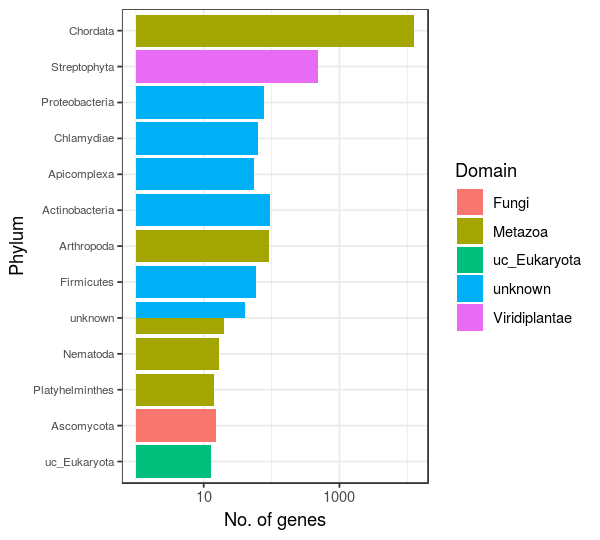

In [19]:
# plotting by phylum
p = tax_s %>%
    filter(n > 10) %>%
    mutate(Phylum = Phylum %>% reorder(n)) %>%
    ggplot(aes(Phylum, n, fill=Domain)) +
    geom_bar(stat='identity', position='dodge') +
    scale_y_log10() +
    labs(y = 'No. of genes') +
    coord_flip() +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=7)
    )

dims(5,4.5)
plot(p)

In [16]:
# top phyla
tax_s %>% 
    arrange(-n) %>%
    head(n=30)

Domain,Phylum,n
Metazoa,Chordata,13117
Viridiplantae,Streptophyta,504
Metazoa,Arthropoda,138
unknown,Actinobacteria,111
unknown,Firmicutes,92
unknown,Proteobacteria,86
unknown,Chlamydiae,63
unknown,Apicomplexa,56
unknown,unknown,41
Fungi,Ascomycota,29


In [17]:
# summarizing taxonomy
tax_s = tax %>%
    filter(Domain != '',
           Phylum != '',
           Class != '') %>%
    group_by(Domain, Phylum, Class) %>%
    summarize(n = seqID %>% unique %>% length) %>%
    ungroup() 
 
tax_s %>% dfhead

[1] 49  4


Domain,Phylum,Class,n
Fungi,Ascomycota,Eurotiomycetes,1
Fungi,Ascomycota,Saccharomycetes,12
Fungi,Ascomycota,Sordariomycetes,1


In [18]:
# top hits
tax_s %>% 
    arrange(-n) %>%
    head(n=30)

Domain,Phylum,Class,n
Metazoa,Chordata,Mammalia,12612
Viridiplantae,Streptophyta,Liliopsida,481
Metazoa,Chordata,unknown,200
Metazoa,Chordata,Aves,135
Metazoa,Chordata,Actinopteri,134
unknown,Actinobacteria,Actinobacteria,94
Metazoa,Arthropoda,Insecta,92
unknown,Proteobacteria,Betaproteobacteria,78
unknown,Chlamydiae,Chlamydiia,63
unknown,Firmicutes,Bacilli,58


## Annotations

In [20]:
# eggnog-mapper v2
cols = c(
"query_name",
"seed_eggNOG_ortholog",
"seed_ortholog_evalue",
"seed_ortholog_score",
"Predicted_taxonomic_group",
"Predicted_protein_name",
"Gene_Ontology_terms",
"EC_number",
"KEGG_ko",
"KEGG_Pathway",
"KEGG_Module",
"KEGG_Reaction",
"KEGG_rclass",
"BRITE",
"KEGG_TC",
"CAZy",
"BiGG_Reaction",
"tax_scope__eggNOG_taxonomic_level_used_for_annotation",
"eggNOG_OGs",
"bestOG",
"COG_Functional_Category",
"eggNOG_free_text_description"
)

In [21]:
F = file.path(work_dir, 'annotate', 'eggnog-mapper', 'clusters_rep-seqs.emapper.annotations.gz')
cmd = glue::glue('gunzip -c {file}', file=F, header=FALSE) 
emap_annot = fread(cmd, sep='\t') 
colnames(emap_annot) = cols
emap_annot = emap_annot %>%
    dplyr::select(-Gene_Ontology_terms)
emap_annot %>% dfhead

[1] 13756    21


query_name,seed_eggNOG_ortholog,seed_ortholog_evalue,seed_ortholog_score,Predicted_taxonomic_group,Predicted_protein_name,EC_number,KEGG_ko,KEGG_Pathway,KEGG_Module,⋯,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,tax_scope__eggNOG_taxonomic_level_used_for_annotation,eggNOG_OGs,bestOG,COG_Functional_Category,eggNOG_free_text_description
eee6fbcd282e4b95ac14d7faa0b955a4,9940.ENSOARP00000007110,3.4e-41,174.1,Cetartiodactyla,,,ko:K10175,,,⋯,,"ko00000,ko03000",,,,Mammalia,"38DJI@33154,3BP1X@33208,3DETD@33213,3JQBZ@40674,48JG6@7711,49GIB@7742,4JCBN@91561,KOG1075@1,KOG1075@2759",NA|NA|NA,S,Reverse transcriptase (RNA-dependent DNA polymerase)
9b5aced26ca6414fb74397b58d080f65,9767.XP_007190003.1,2.1e-34,152.1,Cetartiodactyla,,,,,,⋯,,,,,,Mammalia,"29NW0@1,2RW76@2759,3A58R@33154,3BS92@33208,3D856@33213,3JHHC@40674,48FQN@7711,49CPN@7742,4JC0Q@91561",NA|NA|NA,,
b8271dad1d5e439b8ffa8b098a963fad,9940.ENSOARP00000001217,2.3e-80,305.1,Cetartiodactyla,,,,,,⋯,,,,,,Mammalia,"39RKB@33154,3BK61@33208,3E43G@33213,3JJ5B@40674,48JXY@7711,49GK2@7742,4JCTV@91561,KOG1075@1,KOG1075@2759",NA|NA|NA,S,Endonuclease-reverse transcriptase


In [22]:
# adding taxonomy info
intersect(emap_annot$query_name, tax$seqID) %>% length %>% print

emap_annot = emap_annot %>%
    left_join(tax, c('query_name'='seqID'))

emap_annot %>% dfhead

[1] 13756
[1] 13756    31


query_name,seed_eggNOG_ortholog,seed_ortholog_evalue,seed_ortholog_score,Predicted_taxonomic_group,Predicted_protein_name,EC_number,KEGG_ko,KEGG_Pathway,KEGG_Module,⋯,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus,Species
eee6fbcd282e4b95ac14d7faa0b955a4,9940.ENSOARP00000007110,3.4e-41,174.1,Cetartiodactyla,,,ko:K10175,,,⋯,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA
9b5aced26ca6414fb74397b58d080f65,9767.XP_007190003.1,2.1e-34,152.1,Cetartiodactyla,,,,,,⋯,9739,species,Tursiops truncatus,Metazoa,Chordata,Mammalia,Cetacea,Delphinidae,Tursiops,Tursiops truncatus
b8271dad1d5e439b8ffa8b098a963fad,9940.ENSOARP00000001217,2.3e-80,305.1,Cetartiodactyla,,,,,,⋯,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA


In [23]:
n_annot_seqs = emap_annot$query_name %>% unique %>% length
cat('Number of rep seqs with eggnog-mapper annotations:', n_annot_seqs, '\n')

Number of rep seqs with eggnog-mapper annotations: 13756 


### COG functional categories

* [wiki on categories](https://ecoliwiki.org/colipedia/index.php/Clusters_of_Orthologous_Groups_%28COGs%29)

In [24]:
# summarizing by functional group
max_cat = emap_annot$COG_Functional_Category %>% unique %>% sapply(nchar) %>% max

emap_annot_s = emap_annot %>%
    dplyr::select(query_name, COG_Functional_Category) %>%
    separate(COG_Functional_Category, LETTERS[1:max_cat], sep='(?<=[A-Z])') %>%
    gather(X, COG_func_cat, -query_name) %>%
    filter(!is.na(COG_func_cat),
           COG_func_cat != '') %>%
    dplyr::select(-X) 
    
emap_annot_s %>% dfhead

Warning message:
“Expected 5 pieces. Additional pieces discarded in 1 rows [10056].”Warning message:
“Expected 5 pieces. Missing pieces filled with `NA` in 13752 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”

[1] 12269     2


query_name,COG_func_cat
eee6fbcd282e4b95ac14d7faa0b955a4,S
b8271dad1d5e439b8ffa8b098a963fad,S
9503335b4f81421ab4bf6a5613b5978f,S


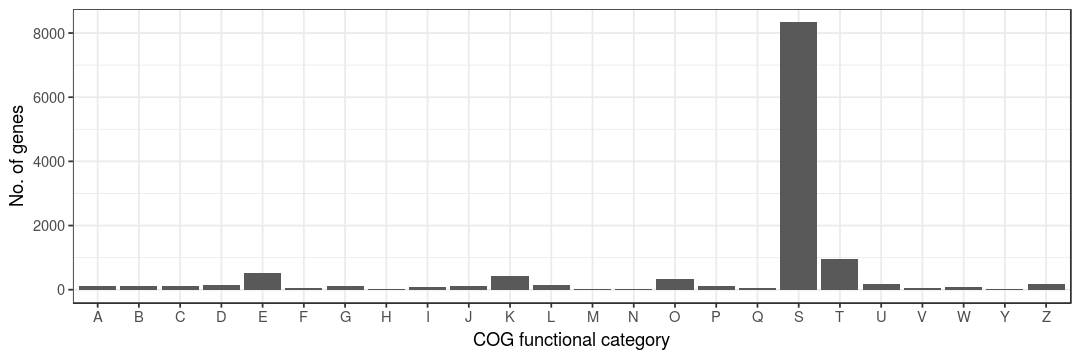

In [25]:
# plotting summary
p = emap_annot_s %>%
    ggplot(aes(COG_func_cat)) +
    geom_bar() +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

dims(9,3)
plot(p)

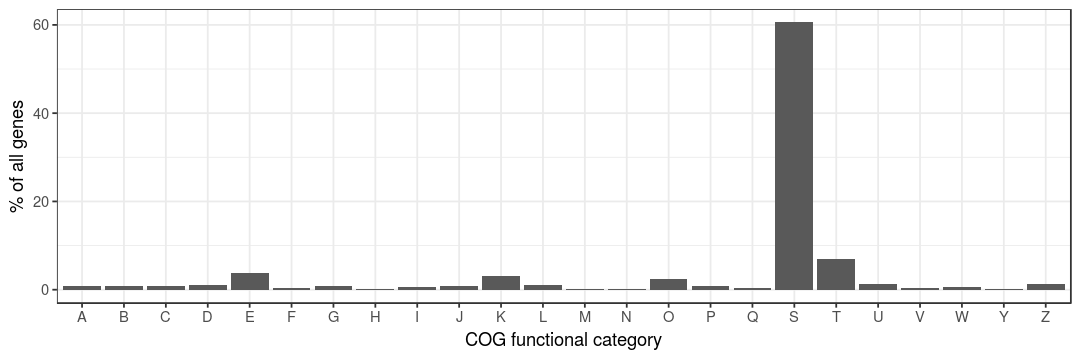

In [26]:
# plotting summary
p = emap_annot_s %>%
    group_by(COG_func_cat) %>%
    summarize(perc_abund = n() / n_annot_seqs * 100) %>%
    ungroup() %>%
    ggplot(aes(COG_func_cat, perc_abund)) +
    geom_bar(stat='identity') +
    labs(x='COG functional category', y='% of all genes') +
    theme_bw() 

dims(9,3)
plot(p)

### Grouped by taxonomy

In [27]:
max_cat = emap_annot$COG_Functional_Category %>% unique %>% sapply(nchar) %>% max

emap_annot_s = emap_annot %>%
    dplyr::select(query_name, COG_Functional_Category) %>%
    separate(COG_Functional_Category, LETTERS[1:max_cat], sep='(?<=[A-Z])') %>%
    gather(X, COG_func_cat, -query_name) %>%
    left_join(tax, c('query_name'='seqID')) %>%
    filter(!is.na(COG_func_cat),
           COG_func_cat != '') %>%
    dplyr::select(-X) 

emap_annot_s %>% dfhead

Warning message:
“Expected 5 pieces. Additional pieces discarded in 1 rows [10056].”Warning message:
“Expected 5 pieces. Missing pieces filled with `NA` in 13752 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”

[1] 12269    12


query_name,COG_func_cat,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus,Species
eee6fbcd282e4b95ac14d7faa0b955a4,S,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA
b8271dad1d5e439b8ffa8b098a963fad,S,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA
9503335b4f81421ab4bf6a5613b5978f,S,59479,species,Rhinolophus ferrumequinum,Metazoa,Chordata,Mammalia,Chiroptera,Rhinolophidae,Rhinolophus,Rhinolophus ferrumequinum


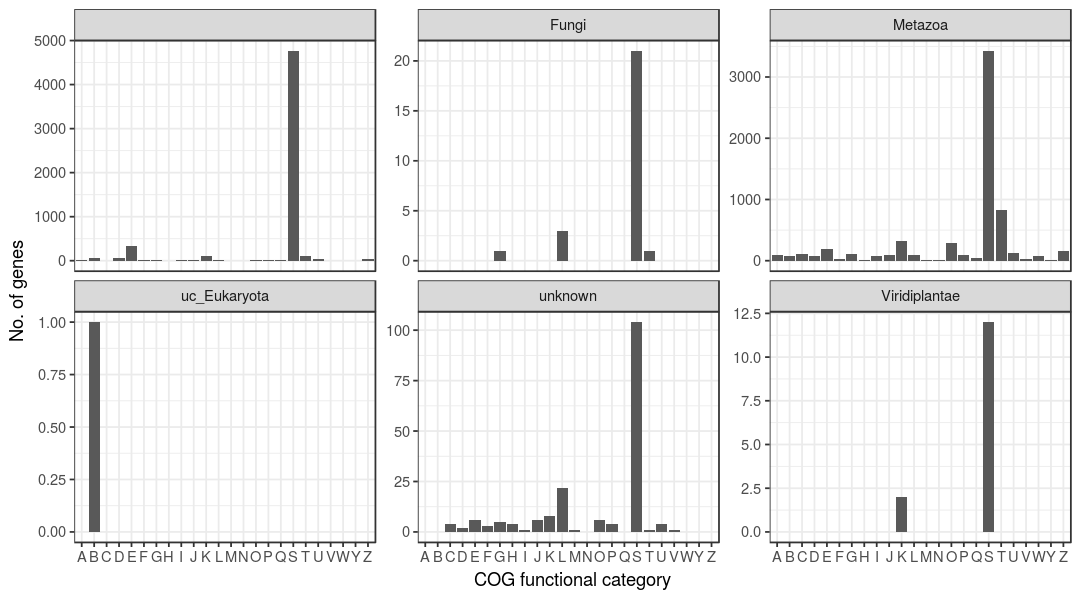

In [28]:
# plotting summary by domain
p = emap_annot_s %>%
    ggplot(aes(COG_func_cat)) +
    geom_bar() +
    facet_wrap(~ Domain, scales='free_y') +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

dims(9,5)
plot(p)

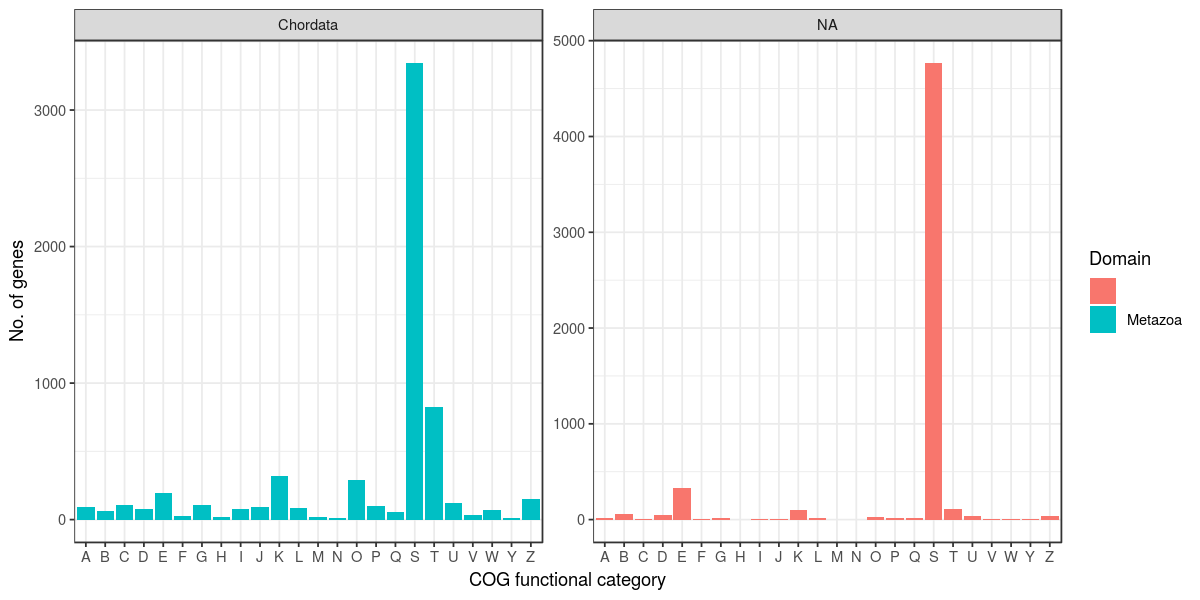

In [29]:
# plotting summary by phylum
p = emap_annot_s %>%
    group_by(Phylum) %>%
    mutate(n = n()) %>%
    ungroup() %>%
    filter(n >= 1000) %>%
    mutate(Phylum = Phylum %>% reorder(-n)) %>%
    ggplot(aes(COG_func_cat, fill=Domain)) +
    geom_bar() +
    facet_wrap(~ Phylum, scales='free_y', ncol=3) +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

dims(10,5)
plot(p)

## humann2 db genes

In [30]:
# gene IDs
F = file.path(work_dir, 'humann2_db', 'clusters_rep-seqs_annot-index.tsv')

hm2 = fread(F, sep='\t', header=TRUE) %>%
    separate(new_name, c('UniRefID', 'Gene_length', 'Taxonomy'), sep='\\|') %>%
    separate(Taxonomy, c('Genus', 'Species'), sep='\\.s__') %>%
    separate(Species, c('Species', 'TaxID'), sep='__taxID') %>%
    mutate(Genus = gsub('^g__', '', Genus))

hm2 %>% dfhead

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 2006 rows [2, 6, 8, 12, 13, 14, 18, 19, 20, 21, 22, 23, 24, 25, 27, 29, 30, 31, 32, 34, ...].”

[1] 3457    6


original_name,UniRefID,Gene_length,Genus,Species,TaxID
d3c38ceb568b4a6480cbcedfcdc5d229,UniRef50_E2PFB3,59,Ovis,Ovis_aries,9940
5cb545a7985844f28cc2fd17d6a74e29,UniRef50_M3XUV9,72,unclassified,unclassified,NA
66bf0e9306454c8b841520bcde461643,UniRef50_K7E2L3,241,Macaca,Macaca_mulatta,9544


In [31]:
# adding taxonomy
intersect(hm2$original_name, tax$seqID) %>% length %>% print

hm2 = hm2 %>%
    left_join(tax, c('original_name'='seqID'))

hm2 %>% dfhead

[1] 3457
[1] 3457   16


original_name,UniRefID,Gene_length,Genus.x,Species.x,TaxID,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus.y,Species.y
d3c38ceb568b4a6480cbcedfcdc5d229,UniRef50_E2PFB3,59,Ovis,Ovis_aries,9940,9940,species,Ovis aries,Metazoa,Chordata,Mammalia,unknown,Bovidae,Ovis,Ovis aries
5cb545a7985844f28cc2fd17d6a74e29,UniRef50_M3XUV9,72,unclassified,unclassified,NA,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA
66bf0e9306454c8b841520bcde461643,UniRef50_K7E2L3,241,Macaca,Macaca_mulatta,9544,9544,species,Macaca mulatta,Metazoa,Chordata,Mammalia,Primates,Cercopithecidae,Macaca,Macaca mulatta


### Summary

In [32]:
# number of unique UniRef IDs
hm2$UniRefID %>% unique %>% length

[1] 668

In [33]:
# duplicate UniRef IDs
hm2 %>%
    group_by(UniRefID) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    filter(n > 1) %>%
    arrange(-n) %>%
    head(n=30)

UniRefID,n
UniRef50_M3XUV9,190
UniRef50_E2PFB3,144
UniRef50_E2PHX8,106
UniRef50_N6V3M2,101
UniRef50_F6QE18,85
UniRef50_O00172,77
UniRef50_E2PHW4,70
UniRef50_Q6RGF7,65
UniRef50_E2PHB4,61
UniRef50_D2H8Q7,56


In [34]:
# number of genes with a taxID
hm2_f = hm2 %>%
    filter(!is.na(TaxID))

hm2_f %>% nrow 

[1] 1451

#### By taxonomy

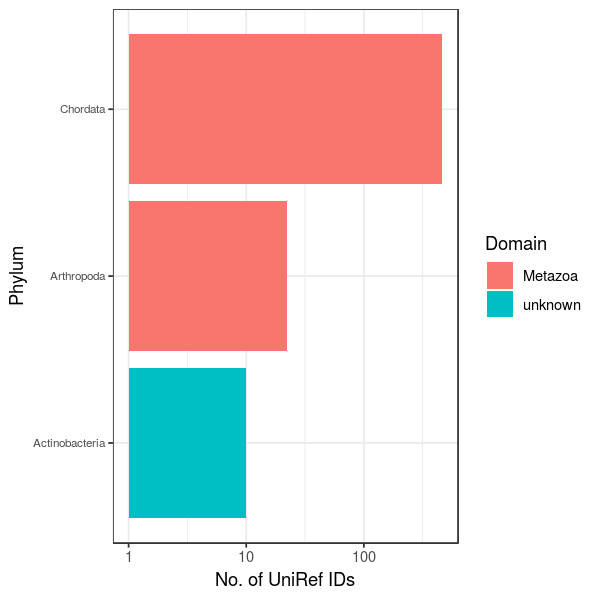

In [35]:
# number of UniRefIDs
hm2_f_s = hm2_f %>%
    group_by(Domain, Phylum) %>%
    summarize(n = UniRefID %>% unique %>% length) %>%
    ungroup()

p = hm2_f_s %>%
    filter(n >= 10) %>%
    mutate(Phylum = Phylum %>% reorder(n)) %>%
    ggplot(aes(Phylum, n, fill=Domain)) +
    geom_bar(stat='identity', position='dodge') +
    scale_y_log10() +
    coord_flip() +
    labs(y='No. of UniRef IDs') +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=7)
    )
    
dims(5,5)
plot(p)

# sessionInfo

In [36]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRlapack.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] bindrcpp_0.2.2    data.table_1.11.4 ggplot2_3.0.0     tidyr_0.8.1      
[5] dplyr_0.7.6      

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.17     pillar_1.2.2     compiler_3.4.1   plyr_1.8.4      
 [5] bindr_0.1.1      base64enc_0.1-3  tools_3.4.1      digest_0.6.15   
 [9] uuid_0.1-2       jsonlite_1.5     evaluate_0.10.1  tibble_1.4.2    
[13] gtable_0.2.0     pkgconfig_2.0.1  rlang_0.2.1      IRdisplay_0.4.4 
[17] IRkernel_0.8.12  repr_0.15.0      withr_2.1.1      stringr_1.3.1   
[21] grid_3.4.1       tidyselec